In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!unzip '/content/drive/My Drive/malaria.zip'  

Streaming output truncated to the last 5000 lines.
  inflating: Malaria Cells/training_set/Uninfected/C236ThinF_IMG_20151127_102428_cell_118.png  
  inflating: Malaria Cells/training_set/Uninfected/C236ThinF_IMG_20151127_102428_cell_126.png  
  inflating: Malaria Cells/training_set/Uninfected/C236ThinF_IMG_20151127_102428_cell_134.png  
  inflating: Malaria Cells/training_set/Uninfected/C236ThinF_IMG_20151127_102428_cell_141.png  
  inflating: Malaria Cells/training_set/Uninfected/C236ThinF_IMG_20151127_102428_cell_168.png  
  inflating: Malaria Cells/training_set/Uninfected/C236ThinF_IMG_20151127_102428_cell_175.png  
  inflating: Malaria Cells/training_set/Uninfected/C236ThinF_IMG_20151127_102428_cell_183.png  
  inflating: Malaria Cells/training_set/Uninfected/C236ThinF_IMG_20151127_102428_cell_221.png  
  inflating: Malaria Cells/training_set/Uninfected/C236ThinF_IMG_20151127_102428_cell_222.png  
  inflating: Malaria Cells/training_set/Uninfected/C236ThinF_IMG_20151127_102428_cell

In [ ]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#path 
my_data_dir = '/content/Malaria Cells'

In [ ]:
os.listdir(my_data_dir) 

['single_prediction', 'testing_set', 'training_set']

In [ ]:
test_path = my_data_dir+'/testing_set'
train_path = my_data_dir+'/training_set'

In [ ]:
os.listdir(test_path)

['Parasitized', 'Uninfected']

In [ ]:
os.listdir(train_path)

['Parasitized', 'Uninfected']

In [ ]:
os.listdir(train_path+'/Parasitized')[0]

'C176P137NThinF_IMG_20151201_122708_cell_143.png'

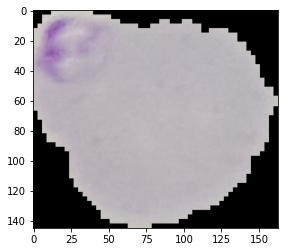

In [ ]:
para_cell = train_path+'/Parasitized'+'/C176P137NThinF_IMG_20151201_122708_cell_143.png'
para_img= imread(para_cell)
plt.imshow(para_img)

In [ ]:
para_img.shape

(145, 163, 3)

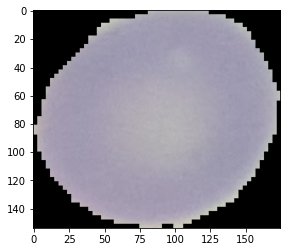

In [ ]:
unifected_cell_path = train_path+'/Uninfected/'+os.listdir(train_path+'//Uninfected')[0]
unifected_cell = imread(unifected_cell_path)
plt.imshow(unifected_cell)

In [ ]:
dim1 = []
dim2 = []
for image_filename in os.listdir(test_path+'/Uninfected'):
    
    img = imread(test_path+'/Uninfected'+'/'+image_filename)
    d1,d2,colors = img.shape
    dim1.append(d1)
    dim2.append(d2)

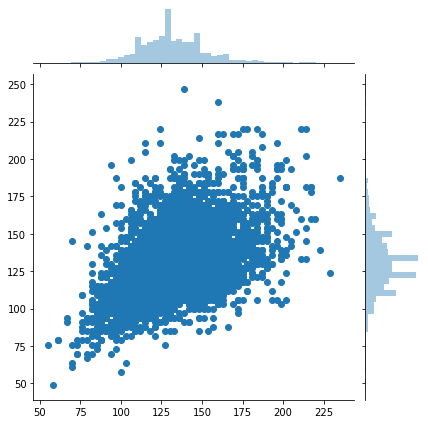

In [ ]:
sns.jointplot(dim1,dim2)

In [ ]:
image_shape = (130,130,3)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
image_gen = ImageDataGenerator(rotation_range=20, # rotate the image 20 degrees
                               width_shift_range=0.10, # Shift the pic width by a max of 5%
                               height_shift_range=0.10, # Shift the pic height by a max of 5%
                               rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.1, # Shear means cutting away part of the image (max 10%)
                               zoom_range=0.1, # Zoom in by 10% max
                               horizontal_flip=True, # Allo horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )

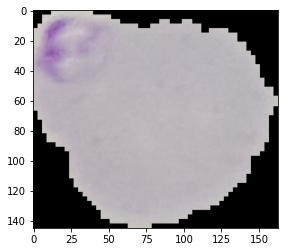

In [ ]:
plt.imshow(para_img)

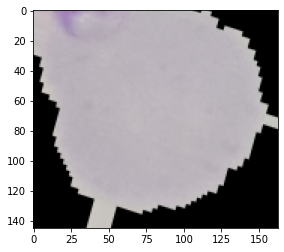

In [ ]:
plt.imshow(image_gen.random_transform(para_img))

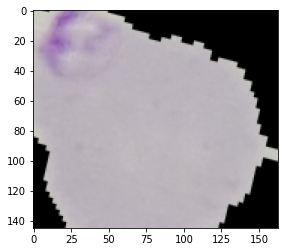

In [ ]:
plt.imshow(image_gen.random_transform(para_img))

In [ ]:
image_gen.flow_from_directory(train_path)

Found 27558 images belonging to 2 classes.


In [ ]:
image_gen.flow_from_directory(test_path)

Found 15832 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Initialising the CNN
classifier = Sequential()

#1 - Convolution
classifier.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
classifier.add(MaxPooling2D(pool_size=(2, 2)))

#2 - Pooling
# Hidden Layer 1
classifier.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
classifier.add(MaxPooling2D(pool_size=(2, 2)))

# Adding a second convolution layer
# relu turns negative values in images to 0
classifier.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
classifier.add(MaxPooling2D(pool_size=(2, 2)))

#3 - Flattening
# converts the matrix in a singe array
classifier.add(Flatten())


classifier.add(Dense(128))
classifier.add(Activation('relu'))


# Dropouts help reduce overfitting by randomly turning neurons off during training.
# Here we say randomly turn off 50% of neurons.
classifier.add(Dropout(0.5))

#4 - Full Connection
# 128 is the final layer of outputs & from that 1 will be considered.
# Last layer, remember its binary so we use sigmoid
classifier.add(Dense(1))
classifier.add(Activation('sigmoid'))

classifier.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stop = EarlyStopping(monitor='val_loss',patience=1)

In [ ]:
batch_size = 16

In [ ]:
train_image_gen = image_gen.flow_from_directory(train_path,
                                               target_size=image_shape[:2],
                                                color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 27558 images belonging to 2 classes.


In [ ]:
test_image_gen = image_gen.flow_from_directory(test_path,
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary',shuffle=False)

Found 15832 images belonging to 2 classes.


In [ ]:
train_image_gen.class_indices

{'Parasitized': 0, 'Uninfected': 1}

In [ ]:
results = classifier.fit_generator(train_image_gen,epochs=20,
                              validation_data=test_image_gen,
                             callbacks=[early_stop])

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
1723/1723 [==============================] - ETA: 0s - loss: 0.6545 - accuracy: 0.5949

In [ ]:
losses = pd.DataFrame(classifier.history.history)

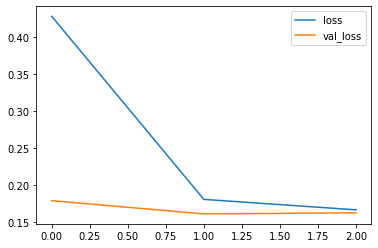

In [ ]:
losses[['loss','val_loss']].plot()

In [ ]:
classifier.metrics_names

['loss', 'accuracy']

In [ ]:
from tensorflow.keras.preprocessing import image

In [ ]:
pred_probabilities = classifier.predict_generator(test_image_gen)

In [ ]:
pred_probabilities

array([[6.0402632e-05],
       [3.2245769e-04],
       [9.1749644e-06],
       ...,
       [9.2887801e-01],
       [9.4863707e-01],
       [8.2673436e-01]], dtype=float32)

In [ ]:
test_image_gen.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [ ]:
predictions = pred_probabilities > 0.5

In [ ]:
# Numpy can treat this as True/False for us
predictions

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(classification_report(test_image_gen.classes,predictions))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95      7952
           1       0.93      0.97      0.95      7880

    accuracy                           0.95     15832
   macro avg       0.95      0.95      0.95     15832
weighted avg       0.95      0.95      0.95     15832



In [ ]:
cm=confusion_matrix(test_image_gen.classes,predictions)

In [ ]:
cm

In [ ]:
cm.diagonal().sum()/cm.sum()*100

94.74482061647296